# Bike Rental Prediction Data Analysis

In [10]:
#importing the Required  libraries 

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")


In [17]:
# importing the Data set
df=pd.read_excel("C:/Users/Thodupunuri Sowmya/Downloads/SeoulBikeData.csv.xlsx")

In [18]:
# Dataset View 
df.head(5)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [19]:
# to get the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [20]:
#  to understand the datset  in a easy way  we are changing the column  names by using the Rename function
df=df.rename(columns={'Temperature(°C)':'Temperature','Humidity(%)':'Humidity','Rainfall(mm)':'Rainfall','Snowfall (cm)':'Snowfall','Wind speed (m/s)':'Wind speed','Visibility (10m)':'Visibility','Solar Radiation (MJ/m2)':'Radiation','Dew point temperature(°C)':'Dew point temperature'})

In [21]:
df.head()

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-12-01,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-12-01,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-12-01,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [24]:
# To descibe the statistical terms using describe function
df.describe().style.background_gradient(axis=0 ,cmap='YlOrRd')
 

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Radiation,Rainfall,Snowfall
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [25]:
# to check the unique values  in the dataset
df.nunique().sort_values(ascending=True)

Holiday                     2
Functioning Day             2
Seasons                     4
Hour                       24
Snowfall                   51
Rainfall                   61
Wind speed                 65
Humidity                   90
Radiation                 345
Date                      365
Temperature               546
Dew point temperature     556
Visibility               1789
Rented Bike Count        2166
dtype: int64

In [26]:
# to check the missing values
df.isnull().sum()

Date                     0
Rented Bike Count        0
Hour                     0
Temperature              0
Humidity                 0
Wind speed               0
Visibility               0
Dew point temperature    0
Radiation                0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning Day          0
dtype: int64

In [29]:
# to get the shape of the dataset
df.shape

(8760, 14)

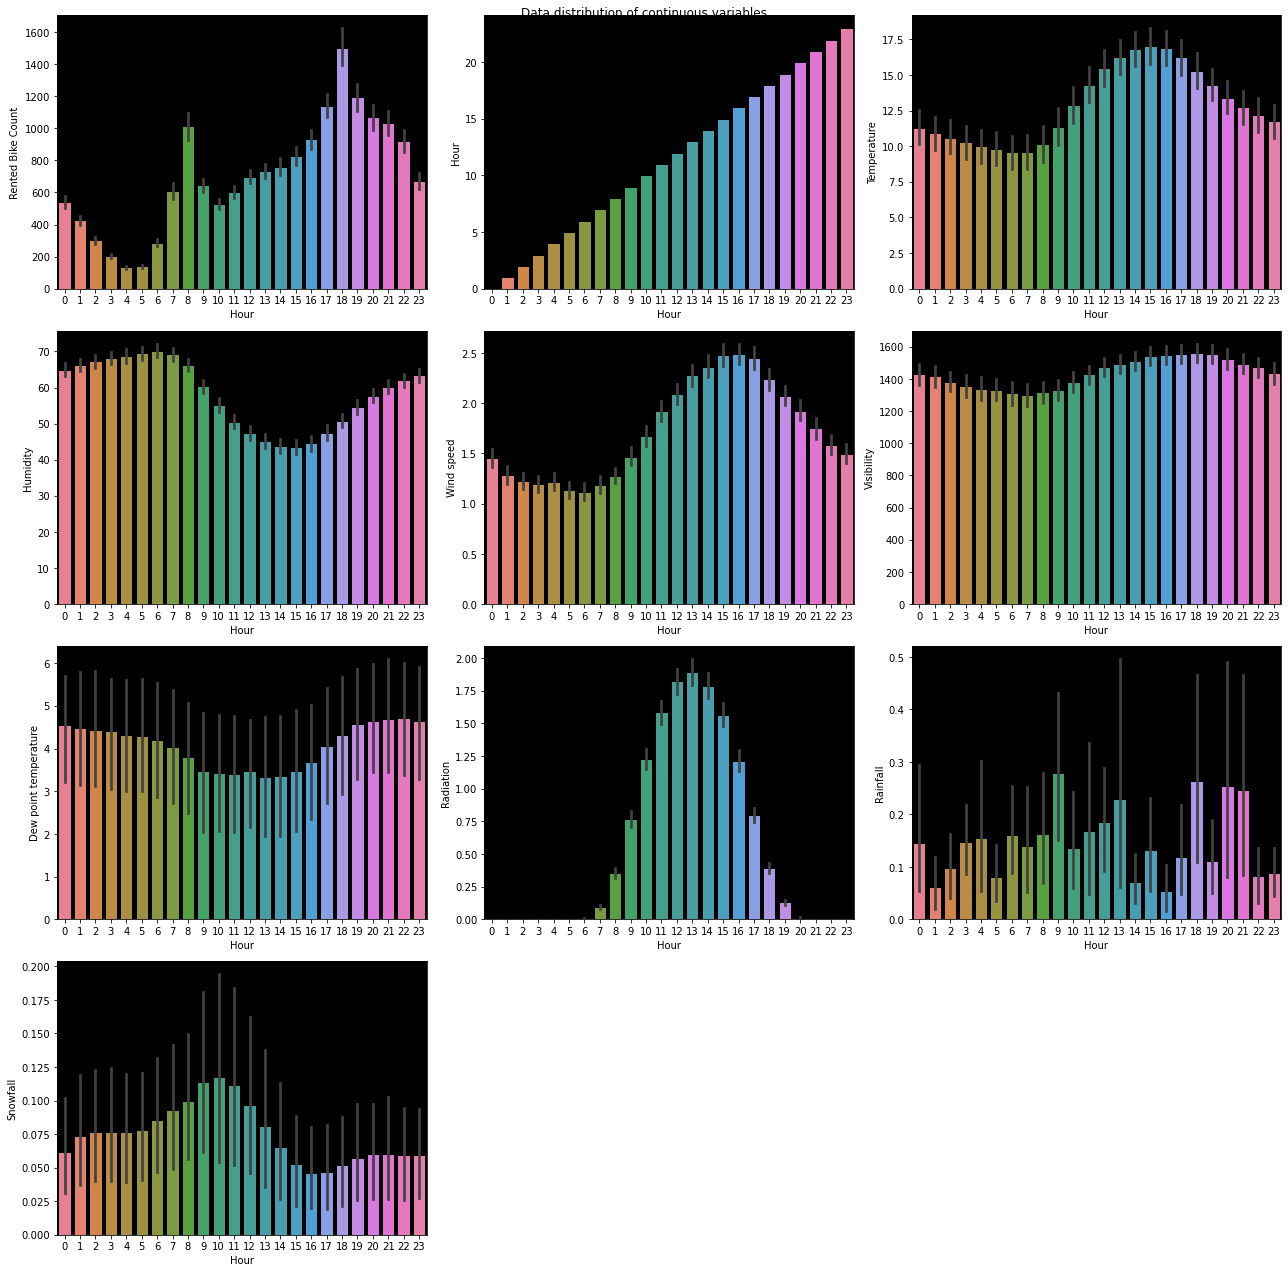

In [30]:
# to check the barplot each  and see the hours wise data distribution
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64','int']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(4,3, i+1)
    sns.barplot(data=df,x='Hour', y=col, ax=ax,edgecolor="black",palette='husl')
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

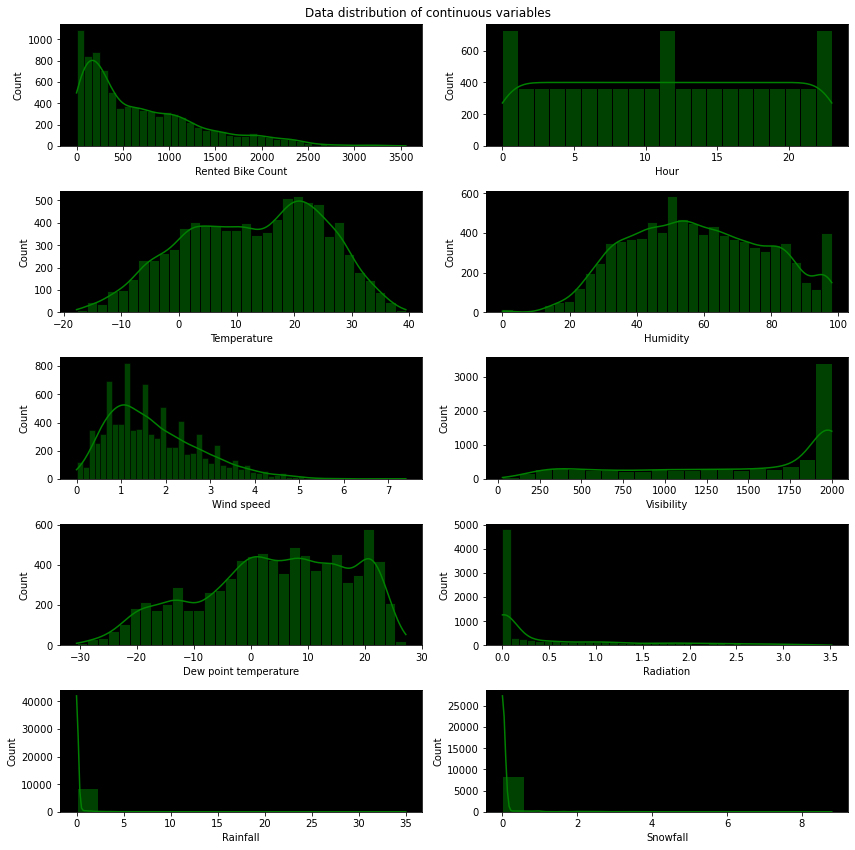

In [32]:
# to check the distribution of each continuous variable
plt.figure(figsize=(12, 12))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(5,2, i+1)
    sns.histplot(data=df, x=col, ax=ax,color='green',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

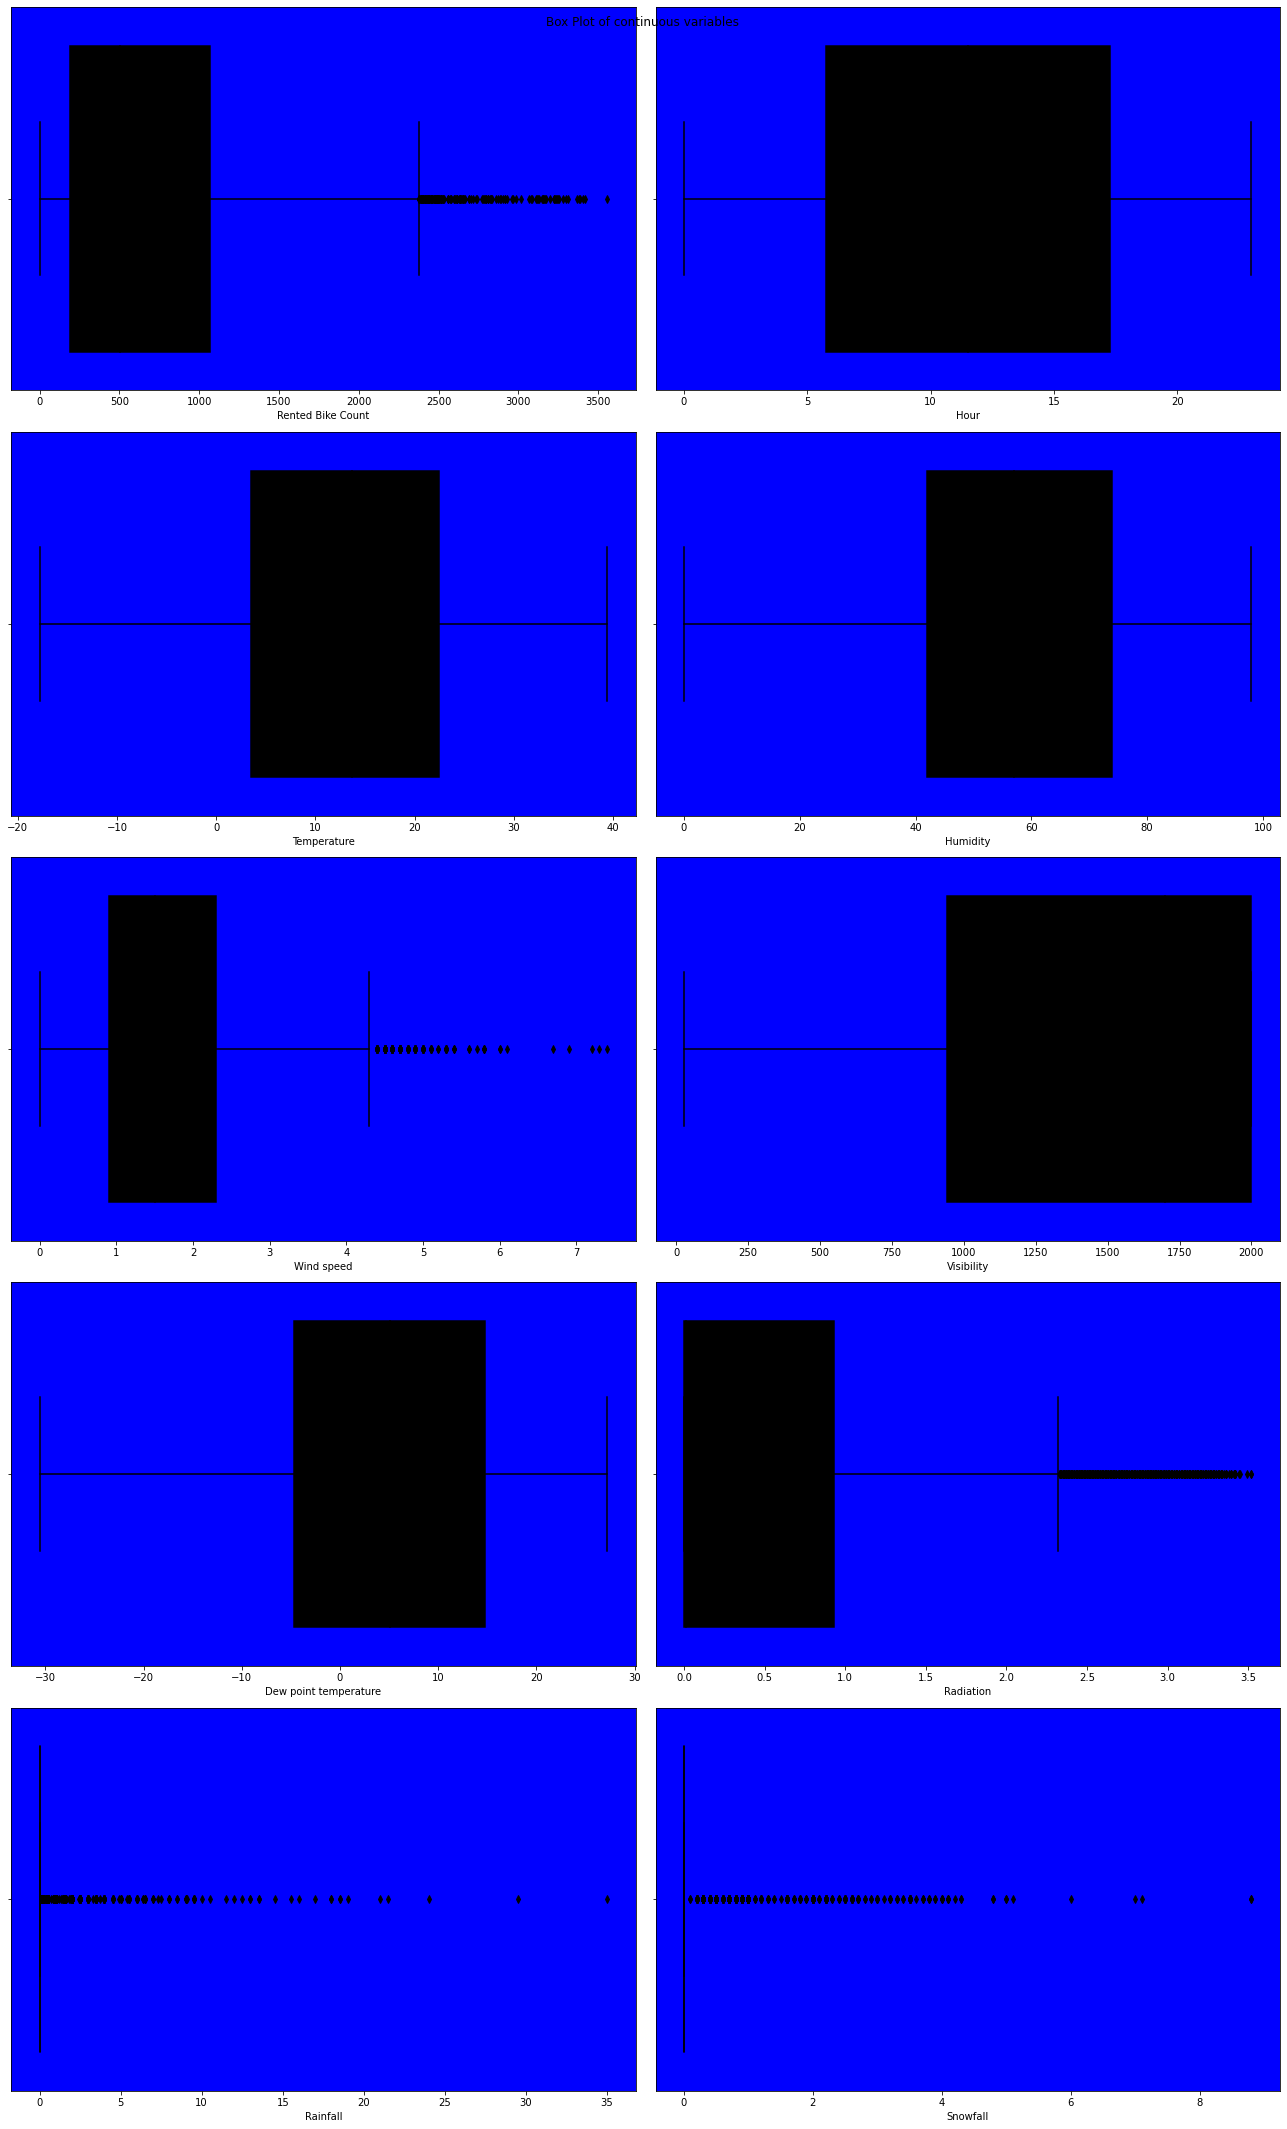

In [34]:
# to check the outliers between the attributes
plt.figure(figsize=(18, 30))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'blue'
    ax = plt.subplot(5,2, i+1)
    sns.boxplot(data=df, x=col, ax=ax,color='black')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

In [35]:
# converting the datatypes for better classification of the data
var=list(df.select_dtypes(include=['float64','int64']).columns)

In [36]:
df.head(2)

,Date,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility,Dew point temperature,Radiation,Rainfall,Snowfall,Seasons,Holiday,Functioning Day
0,2017-12-01,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-12-01,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [37]:
# to change the dataset into uniform model and to make the distribution to be symmetrical 
from sklearn.preprocessing import PowerTransformer
sc_X=PowerTransformer(method = 'yeo-johnson')
df[var]=sc_X.fit_transform(df[var])

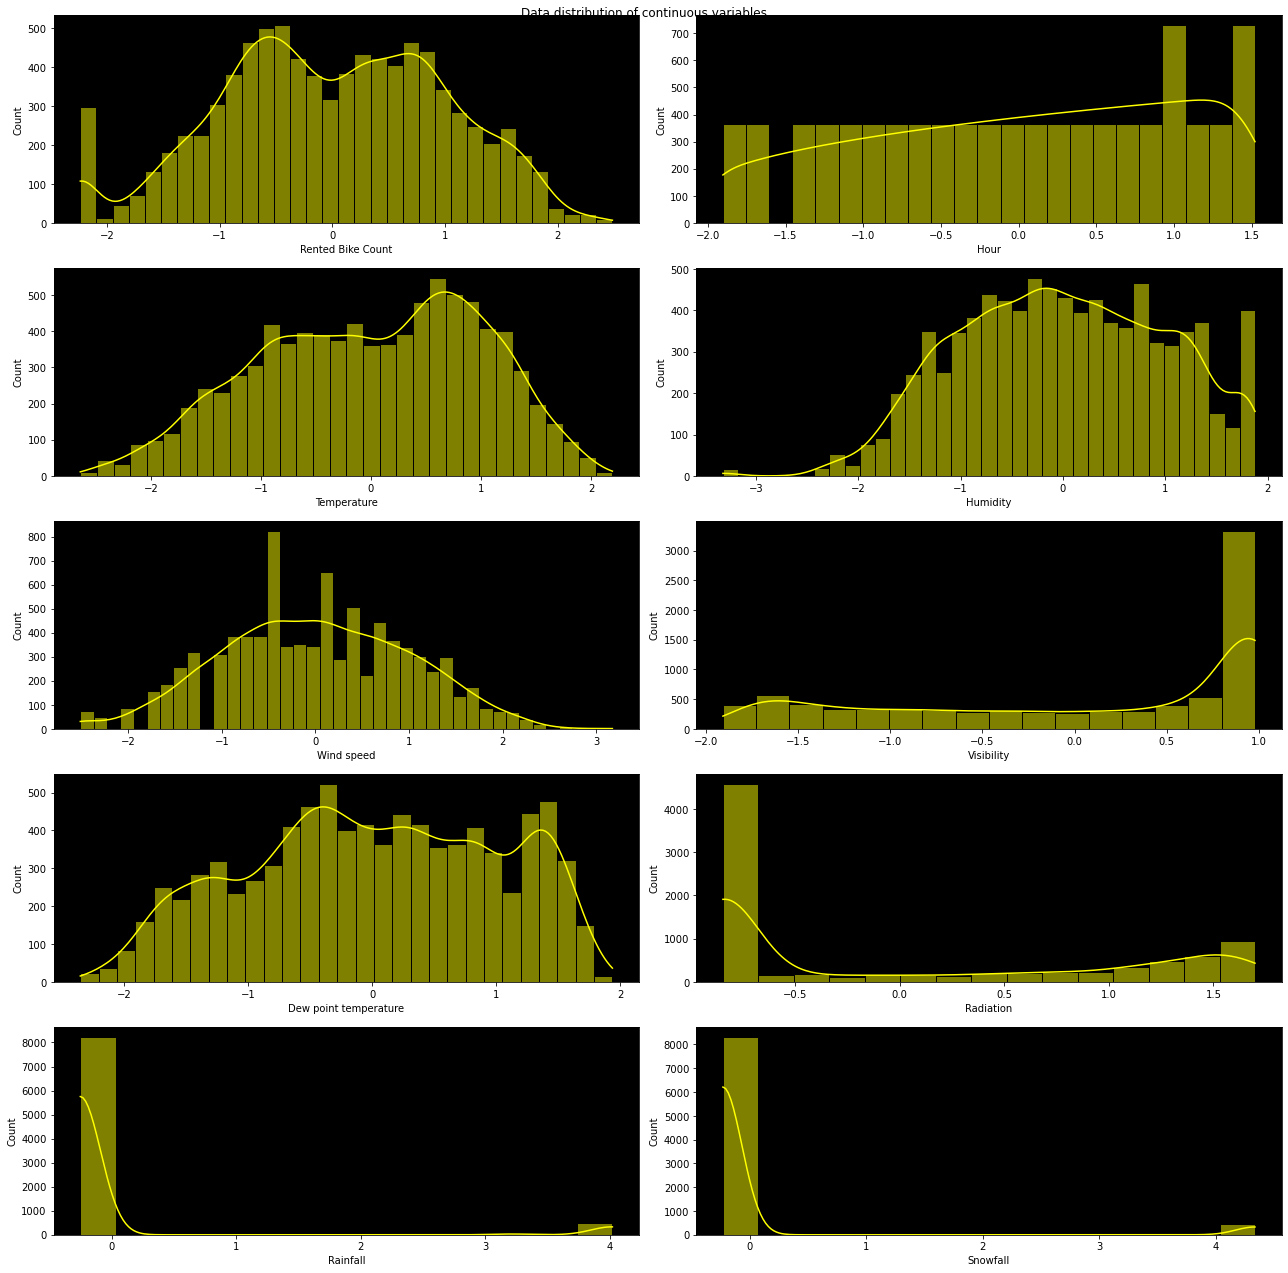

In [38]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(5,2, i+1)
    sns.histplot(data=df, x=col, ax=ax,color='yellow',kde=True)
plt.suptitle('Data distribution of continuous variables')
plt.tight_layout()

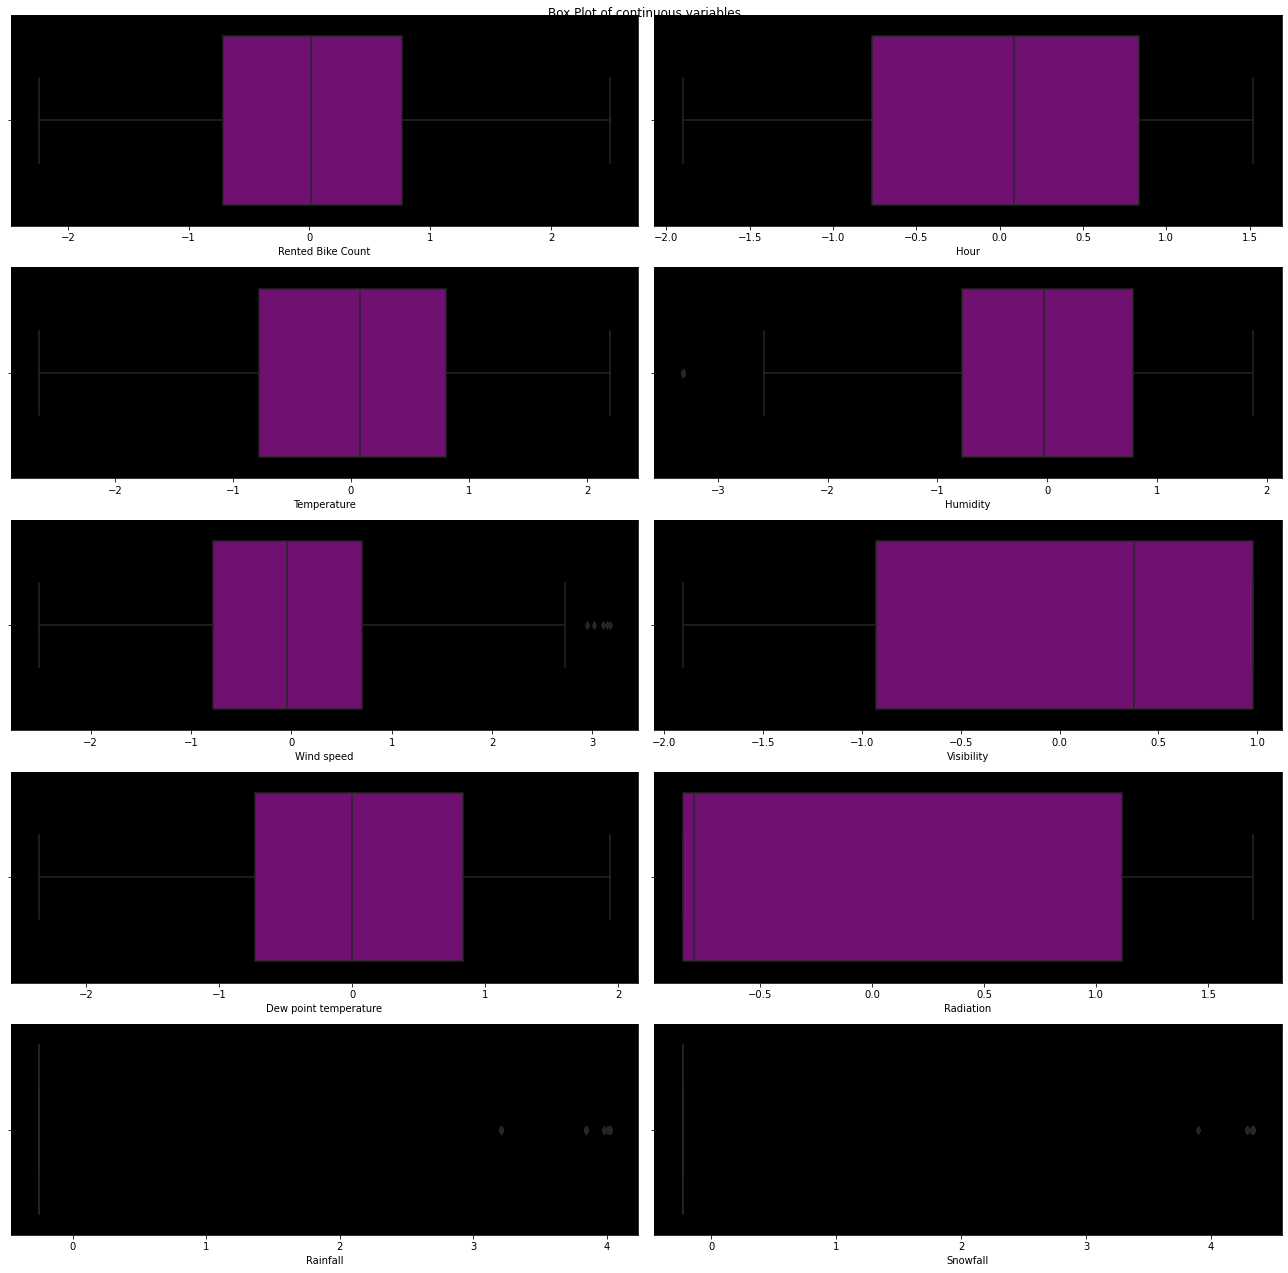

In [40]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.select_dtypes(include=['float64','int64']).columns):
    plt.rcParams['axes.facecolor'] = 'black'
    ax = plt.subplot(5,2, i+1)
    sns.boxplot(data=df, x=col, ax=ax,color='purple')
plt.suptitle('Box Plot of continuous variables')
plt.tight_layout()

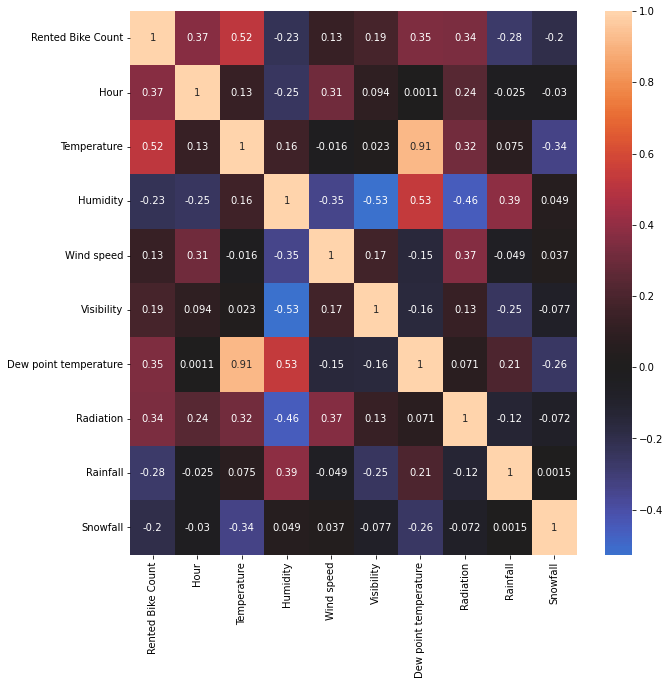

In [41]:
# To check the correlation between the attributes uing heatmap function
plt.figure(figsize=(10,10))
sns.heatmap(df.select_dtypes(include=['float']).corr(),annot=True,center = 0)
plt.show()


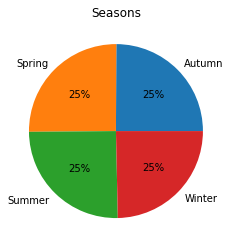

In [42]:
#  pie chart for  seasons
season_var=pd.crosstab(index=df['Seasons'],columns='% observations')
plt.pie(season_var['% observations'],labels=season_var['% observations'].index,autopct='%.0f%%')
plt.title('Seasons')
plt.show()

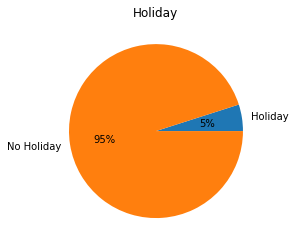

In [43]:
# pie chart for holyday attribute
holiday_var=pd.crosstab(index=df['Holiday'],columns='% observations')
plt.pie(holiday_var['% observations'],labels=holiday_var['% observations'].index,autopct='%.0f%%')
plt.title('Holiday')
plt.show()

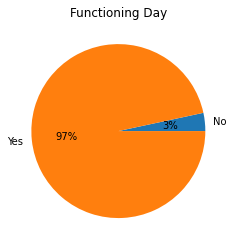

In [44]:
Functioning_Day_var=pd.crosstab(index=df['Functioning Day'],columns='% observations')
plt.pie(Functioning_Day_var['% observations'],labels=Functioning_Day_var['% observations'].index,autopct='%.0f%%')
plt.title('Functioning Day')
plt.show()

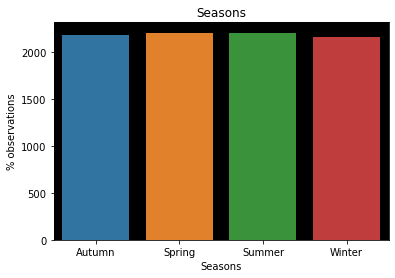

In [45]:
# count plot for season attribute
sns.barplot(x=season_var.index,y=season_var['% observations'])
plt.title('Seasons')
plt.show()


In [ ]:
# as all the seasons are in equal hence it is plotted as equally 

In [50]:
df=pd.get_dummies(df,columns=['Holiday','Seasons','Functioning Day','Hour'],drop_first=True)

In [51]:
# calculate the variance inflation factor
X=df.iloc[:,2:]
y=df.iloc[:,1]
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [52]:
calc_vif(X.select_dtypes(include=['float','int']))

,variables,VIF
0,Temperature,45.786458
1,Humidity,12.009217
2,Wind speed,1.232661
3,Visibility,1.559788
4,Dew point temperature,60.274115
5,Radiation,1.858131
6,Rainfall,1.195148
7,Snowfall,1.166736


In [53]:
# as the  VIF value for  dew point temperature
del X['Dew point temperature']

In [55]:
# After deleting the  Dew point temparature

calc_vif(X.select_dtypes(include=['float','int']))



,variables,VIF
0,Temperature,1.561902
1,Humidity,2.437890
2,Wind speed,1.232537
3,Visibility,1.496192
4,Radiation,1.827230
5,Rainfall,1.194817
6,Snowfall,1.162319


In [ ]:
#Each variable is within the range between 1 and 5

In [56]:
# Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

In [57]:
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X, y)

SelectKBest(k='all', score_func=<function f_regression at 0x000001C70258E5E0>)

In [61]:
feature_contribution=(fs.scores_/sum(fs.scores_))*100

Temperature : 24.19%
Humidity : 3.52%
Wind speed : 1.16%
Visibility : 2.43%
Radiation : 8.55%
Rainfall : 5.65%
Snowfall : 2.65%
Holiday_No Holiday : 0.53%
Seasons_Spring : 0.07%
Seasons_Summer : 6.95%
Seasons_Winter : 13.04%
Functioning Day_Yes : 13.83%
Hour_-1.6548714129993143 : 0.27%
Hour_-1.4402626210764762 : 0.91%
Hour_-1.2448659139264244 : 1.95%
Hour_-1.062615753178147 : 3.25%
Hour_-0.8902006518776767 : 3.11%
Hour_-0.725556724703515 : 1.15%
Hour_-0.5672855293241121 : 0.02%
Hour_-0.41438295457830404 : 0.47%
Hour_-0.2660965591935002 : 0.00%
Hour_-0.12184366457225562 : 0.05%
Hour_0.01883886463516997 : 0.00%
Hour_0.15632703712075513 : 0.04%
Hour_0.29093154570740787 : 0.08%
Hour_0.42291295238673404 : 0.11%
Hour_0.5524925678867186 : 0.21%
Hour_0.6798604391497868 : 0.39%
Hour_0.805181338250089 : 0.93%
Hour_0.9285993359197644 : 2.18%
Hour_1.0502413509653417 : 0.97%
Hour_1.1702199445458765 : 0.56%
Hour_1.2886355482102019 : 0.49%
Hour_1.4055782609097562 : 0.28%
Hour_1.5211293134468649 : 0.0

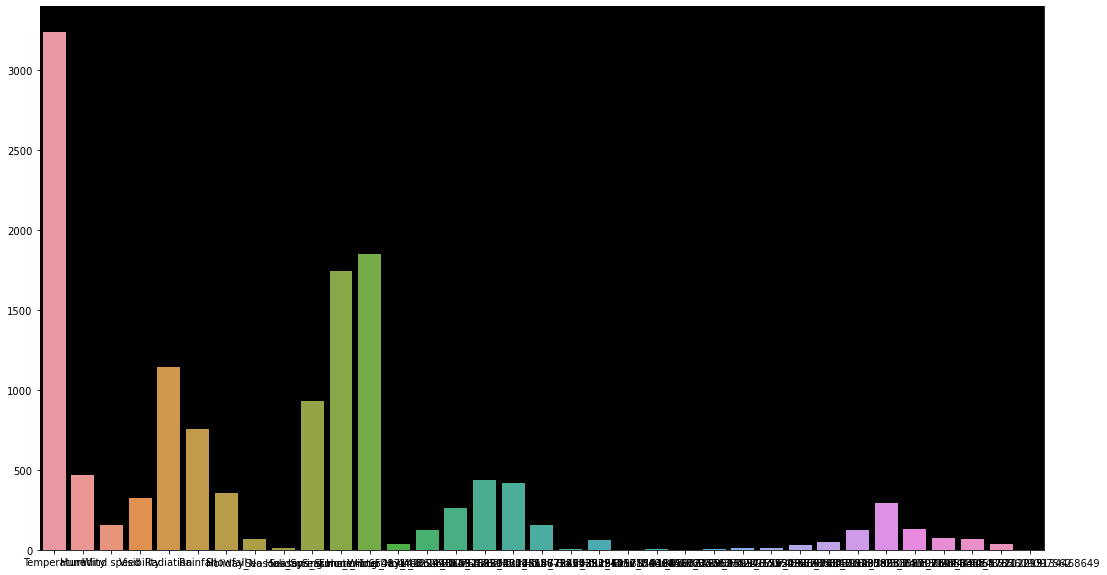

In [64]:
#Feature importance Graph 
for i,j in enumerate(X.columns):
    print(f'{j} : {feature_contribution[i]:.2f}%')
plt.figure(figsize=(18,10))
sns.barplot(x=X.columns,y=fs.scores_)
plt.show()

In [65]:
#Splitting our dataset into train and test set 

from sklearn.model_selection import train_test_split

In [66]:
#splitting our dataset in 80% training and 20% testset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=0)

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [69]:
#importing different Regression models
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import cross_val_score

In [70]:
#creating dictionary for storing different models accuracy
model_comparison={}

In [71]:
# linear regression
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Linear Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 80.76%
Model MSE : 19.16%
Cross Val Accuracy: 80.35 %
Cross Val Standard Deviation: 0.59 %


In [72]:
import statsmodels.api as sm
lin_reg=sm.OLS(y_train,X_train).fit()
lin_reg.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:      Rented Bike Count   R-squared (uncentered):                   0.807
Model:                            OLS   Adj. R-squared (uncentered):              0.805
Method:                 Least Squares   F-statistic:                              726.5
Date:                Thu, 02 Feb 2023   Prob (F-statistic):                        0.00
Time:                        20:49:51   Log-Likelihood:                         -3668.0
No. Observations:                6132   AIC:                                      7406.
Df Residuals:                    6097   BIC:                                      7641.
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3607      0.013     27.283      0.000       0.335       0.387
x2            -0.1188      0.010    -12.492      0.000      -0.137      -0.100
x3            -0.0206      0.007     -3.046      0.002      -0.034      -0.007
x4             0.0084      0.007      1.157      0.247      -0.006       0.023
x5             0.2291      0.017     13.603      0.000       0.196       0.262
x6            -0.2603      0.006    -40.988      0.000      -0.273      -0.248
x7            -0.0006      0.006     -0.102      0.919      -0.013       0.012
x8             0.0513      0.006      8.986      0.000       0.040       0.063
x9            -0.1030      0.007    -13.836      0.000      -0.118      -0.088
x10           -0.0957      0.009    -10.381      0.000      -0.114      -0.078
x11           -0.2716      0.010    -25.983      0.000      -0.292      -0.251
x12            0.4646      0.006     79.193      0.000       0.453       0.476
x13           -0.0427      0.008     -5.447      0.000      -0.058      -0.027
x14           -0.0908      0.008    -11.508      0.000      -0.106      -0.075
x15           -0.1212      0.008    -15.453      0.000      -0.137      -0.106
x16           -0.1727      0.008    -22.168      0.000      -0.188      -0.157
x17           -0.1624      0.008    -20.873      0.000      -0.178      -0.147
x18           -0.0758      0.008     -9.681      0.000      -0.091      -0.060
x19            0.0035      0.008      0.438      0.661      -0.012       0.019
x20            0.0594      0.008      7.047      0.000       0.043       0.076
x21           -0.0377      0.009     -4.072      0.000      -0.056      -0.020
x22           -0.1138      0.010    -11.567      0.000      -0.133      -0.095
x23           -0.1130      0.010    -11.231      0.000      -0.133      -0.093
x24           -0.0958      0.010     -9.428      0.000      -0.116      -0.076
x25           -0.1002      0.010     -9.764      0.000      -0.120      -0.080
x26           -0.0995      0.010     -9.707      0.000      -0.120      -0.079
x27           -0.0798      0.010     -7.930      0.000      -0.100      -0.060
x28           -0.0477      0.010     -4.886      0.000      -0.067      -0.029
x29            0.0128      0.009      1.391      0.164      -0.005       0.031
x30            0.1193      0.008     14.495      0.000       0.103       0.135
x31            0.0908      0.008     11.289      0.000       0.075       0.107
x32            0.0832      0.008     10.710      0.000       0.068       0.098
x33            0.0975      0.008     12.277      0.000       0.082       0.113
x34            0.0698      0.008      8.942      0.000       0.055       0.085
x35            0.0129      0.008      1.675      0.094      -

In [73]:
residuals = lin_reg.resid
fitted_value=lin_reg.fittedvalues

In [74]:
np.mean(residuals)

0.010699177021444102

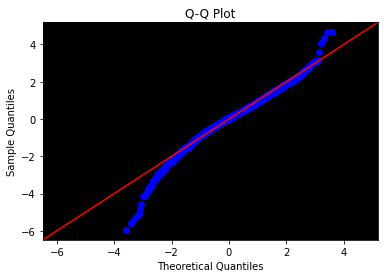

In [78]:
# Checking for normality of the residuals
sm.qqplot(residuals,fit=True,line='45')
plt.title('Q-Q Plot')
plt.show()

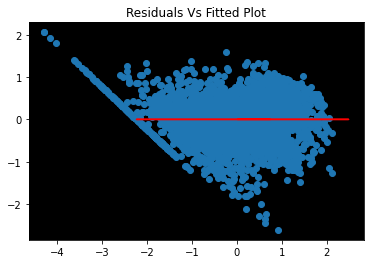

In [79]:
# Checking for homoscedasticity
plt.scatter(fitted_value, residuals)
plt.plot(y_train, [0]*len(y_train),c='r')
plt.title('Residuals Vs Fitted Plot')
plt.show()

In [82]:
 # Polynomial Regression
poly_reg=PolynomialFeatures(degree=2)
model=LinearRegression()
model.fit(poly_reg.fit_transform(X_train),y_train)
y_pred=model.predict(poly_reg.fit_transform(X_test))
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Polynomial Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 88.66%
Model MSE : 11.29%
Cross Val Accuracy: 80.35 %
Cross Val Standard Deviation: 0.59 %


In [83]:
# Decision Tree Regression
model=DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Decision Tree Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 80.33%
Model MSE : 19.59%
Cross Val Accuracy: 79.01 %
Cross Val Standard Deviation: 1.25 %


In [84]:
# Random Forest Regression
model=RandomForestRegressor(n_estimators=10,random_state=0)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Random forest Regression']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 87.36%
Model MSE : 12.59%
Cross Val Accuracy: 88.22 %
Cross Val Standard Deviation: 0.66 %


In [85]:
# Bagging Regressor 
from sklearn.ensemble import BaggingRegressor
model= BaggingRegressor(RandomForestRegressor(n_estimators=10,random_state=0),random_state=0)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Bagging Regressor']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 88.48%
Model MSE : 11.48%
Cross Val Accuracy: 89.12 %
Cross Val Standard Deviation: 0.69 %


In [86]:
# Stacking Regressor 
estimators=[('linear regression',LinearRegression()),('Decision Tree',DecisionTreeRegressor()),('random forest',RandomForestRegressor(n_estimators=10,random_state=0)),('bagging',BaggingRegressor(RandomForestRegressor(n_estimators=10,random_state=0),random_state=0))]

In [87]:
model=StackingRegressor(estimators=estimators,final_estimator=LinearRegression(),passthrough=True)
model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print(f"Model R-Square : {r2_score(y_test,y_pred)*100:.2f}%")
print(f"Model MSE : {mean_squared_error(y_test,y_pred)*100:.2f}%")
accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 5)
print("Cross Val Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Cross Val Standard Deviation: {:.2f} %".format(accuracies.std()*100))
model_comparison['Stacking Regressor']=[r2_score(y_test,y_pred),mean_squared_error(y_test,y_pred),(accuracies.mean()),(accuracies.std())]

Model R-Square : 89.05%
Model MSE : 10.91%
Cross Val Accuracy: 89.76 %
Cross Val Standard Deviation: 0.59 %


In [88]:
#Model Comparison 
Model_com_df=pd.DataFrame(model_comparison).T
Model_com_df.columns=['R-Square','MSE','CV Accuracy','CV std']
Model_com_df=Model_com_df.sort_values(by='R-Square',ascending=False)
Model_com_df.style.format("{:.2%}").background_gradient(cmap='RdYlBu_r')

,R-Square,MSE,CV Accuracy,CV std
Stacking Regressor,89.05%,10.91%,89.76%,0.59%
Polynomial Regression,88.66%,11.29%,80.35%,0.59%
Bagging Regressor,88.48%,11.48%,89.12%,0.69%
Random forest Regression,87.36%,12.59%,88.22%,0.66%
Linear Regression,80.76%,19.16%,80.35%,0.59%
Decision Tree Regression,80.33%,19.59%,79.01%,1.25%


In [89]:
#Maximum Accuracies in each Column 
Model_com_df.style.highlight_max().set_caption("Maximum Score in each Column").format("{:.2%}")

,R-Square,MSE,CV Accuracy,CV std
Stacking Regressor,89.05%,10.91%,89.76%,0.59%
Polynomial Regression,88.66%,11.29%,80.35%,0.59%
Bagging Regressor,88.48%,11.48%,89.12%,0.69%
Random forest Regression,87.36%,12.59%,88.22%,0.66%
Linear Regression,80.76%,19.16%,80.35%,0.59%
Decision Tree Regression,80.33%,19.59%,79.01%,1.25%


In [90]:
#Minimum Accuracies in each Column 
Model_com_df.style.highlight_min().set_caption("Minimum Score in each Column").format("{:.2%}")

,R-Square,MSE,CV Accuracy,CV std
Stacking Regressor,89.05%,10.91%,89.76%,0.59%
Polynomial Regression,88.66%,11.29%,80.35%,0.59%
Bagging Regressor,88.48%,11.48%,89.12%,0.69%
Random forest Regression,87.36%,12.59%,88.22%,0.66%
Linear Regression,80.76%,19.16%,80.35%,0.59%
Decision Tree Regression,80.33%,19.59%,79.01%,1.25%
